In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


c:\Users\wassfila\Projects\ml


squeeze(True,False) returns a time series

using date_parser=pd.to_datetime with default units="ns" gets the error of Python int too large to convert to C long
this is incenvenient because ns is the default influx export, and python code is slow at converting each entry to ms

## references

[PythonDataScienceHandbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb)

[pandas read_csv and epochtime](https://kaijento.github.io/2017/03/29/pandas-read_csv-epoch/)

[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

[to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("balcony_temperature_series.csv", 
                    index_col="time", 
                    squeeze=True ,
                    date_parser=lambda ts:pd.to_datetime(int(ts) // 1000, unit="us")
                )


In [4]:
print(df.dtypes)
print("--- shape ---")
print(df.shape)
print("--- head ---")
print(df.head())

float64
--- shape ---
(178322,)
--- head ---
time
2018-05-26 09:17:56.813110    26.600000
2018-05-26 09:18:56.818370    26.709999
2018-05-26 09:19:56.814750    26.930000
2018-05-26 09:20:56.813930    26.830000
2018-05-26 09:21:56.814210    26.860001
Name: temperature, dtype: float64


In [5]:
#time selection
print(df["2018-06-27":"2018-06-28"].count())
print(df["2018-06-29"].count())
print(df["2018-06-27":"2018-06-27 00:30"])

2100
1043
time
2018-06-27 00:00:49.558420    15.51
2018-06-27 00:03:49.423930    15.49
2018-06-27 00:04:50.459780    15.47
2018-06-27 00:05:49.550060    15.46
2018-06-27 00:06:50.285440    15.44
2018-06-27 00:08:50.028600    15.42
2018-06-27 00:11:49.957160    15.36
2018-06-27 00:12:50.195800    15.37
2018-06-27 00:13:50.032010    15.36
2018-06-27 00:15:49.421890    15.35
2018-06-27 00:16:50.178080    15.35
2018-06-27 00:18:49.695130    15.32
2018-06-27 00:20:50.175920    15.30
2018-06-27 00:21:49.417970    15.30
2018-06-27 00:22:49.559380    15.30
2018-06-27 00:24:49.572990    15.29
2018-06-27 00:25:49.961250    15.30
2018-06-27 00:26:50.280030    15.29
2018-06-27 00:27:50.305710    15.27
2018-06-27 00:28:49.432630    15.26
2018-06-27 00:29:49.918160    15.25
2018-06-27 00:30:49.910200    15.25
Name: temperature, dtype: float64


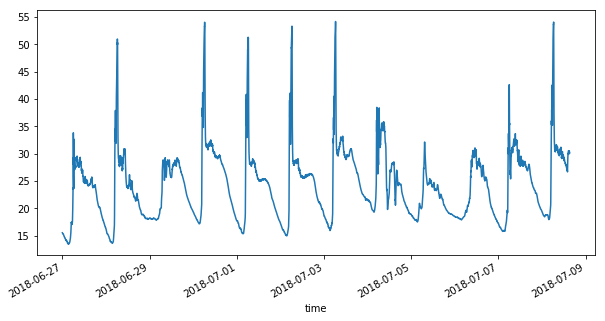

In [6]:
df["2018-06-27":"2018-07-10"].plot(figsize=(10,5))

In [7]:
#plt.rcParams['figure.figsize'] = [200, 100]

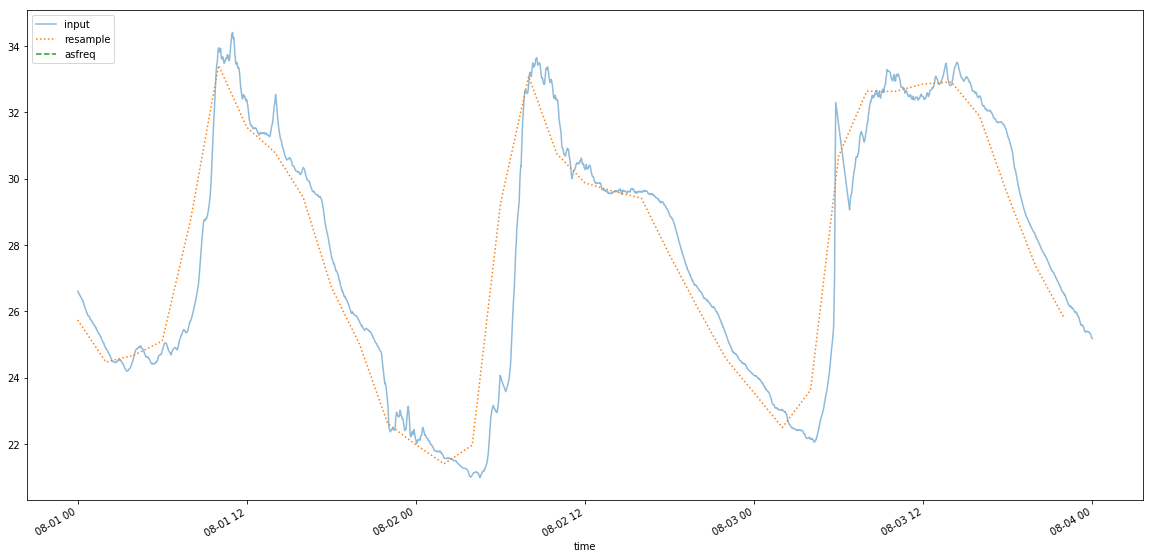

In [8]:
fewdays = df["2018-08-01":"2018-08-3"]
fewdays.plot(alpha=0.5, style='-',figsize=(20,10))
fewdays.resample('2 H').mean().plot(style=':')
fewdays.asfreq('2 H').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')


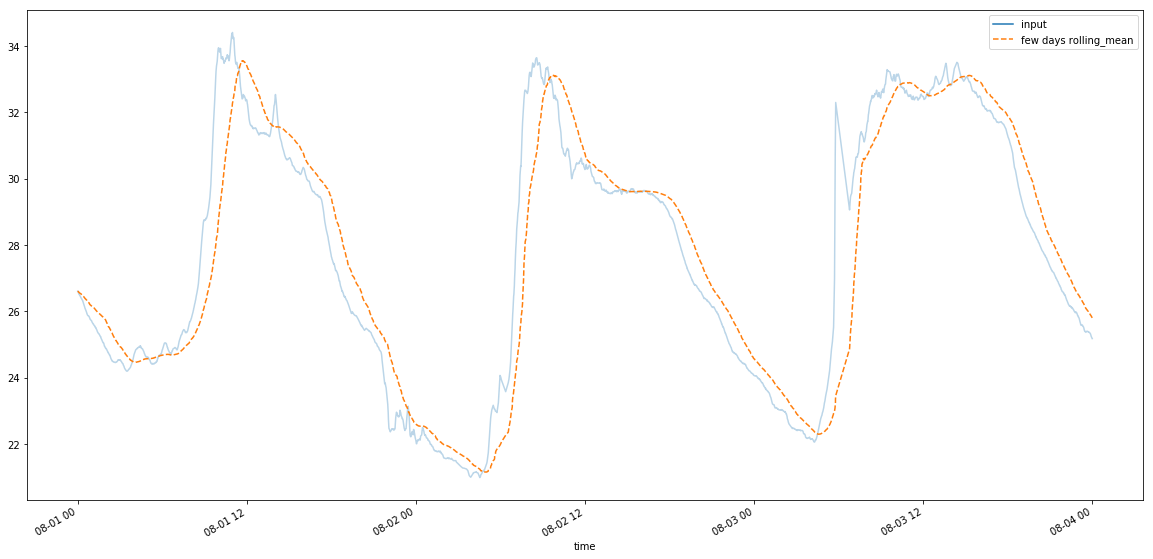

In [9]:
rolling = fewdays.rolling('2 H')

data = pd.DataFrame({'input': fewdays,
                     'few days rolling_mean': rolling.mean()})
ax = data.plot(style=['-', '--'], figsize=(20,10))
ax.lines[0].set_alpha(0.3)

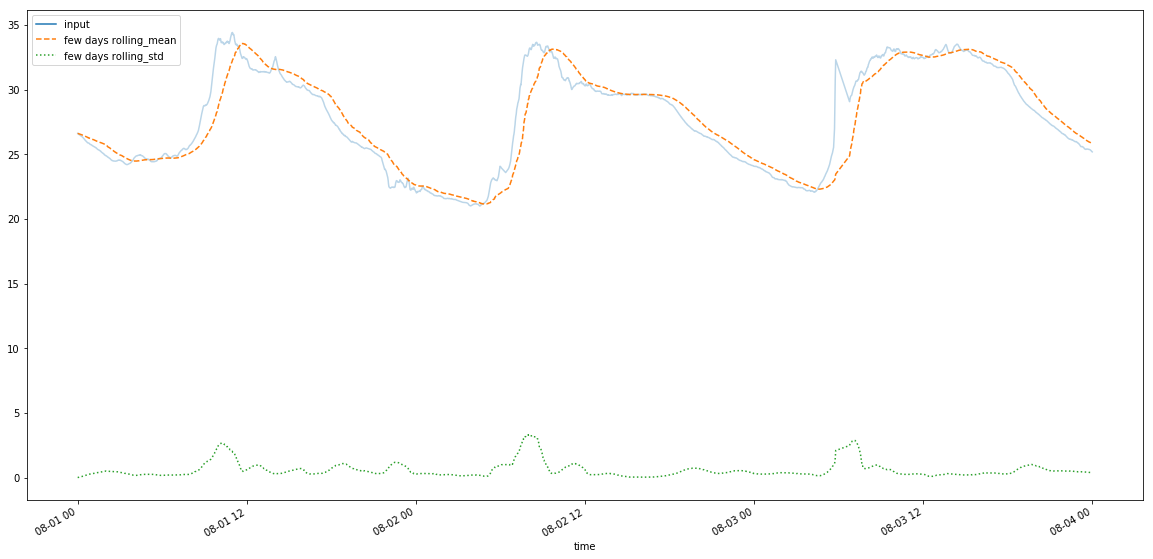

In [10]:
#rolling = fewdays.rolling(20, center=True)
rolling = fewdays.rolling('2 H')

data = pd.DataFrame({'input': fewdays,
                     'few days rolling_mean': rolling.mean(),
                     'few days rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(20,10))
ax.lines[0].set_alpha(0.3)
